In [152]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
import datetime as dt
from dateutil import parser
import json
import requests
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [153]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [154]:
print(plt.__file__)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py


In [155]:

file_name = os.path.join("Resources", "IBM.csv")
ibm_df = pd.read_csv(file_name)
fname2 = os.path.join("Resources", "DJI.csv")
dji_df = pd.read_csv(fname2)
ibm_df.head()
fname3 = os.path.join("Resources", "csco.csv")
csco_df = pd.read_csv(fname3)
fname3 = os.path.join("Resources", "qcom.csv")
qcom_df = pd.read_csv(fname3)
fname3 = os.path.join("Resources", "ebay.csv")
ebay_df = pd.read_csv(fname3)
fname3 = os.path.join("Resources", "amzn.csv")
amzn_df = pd.read_csv(fname3)



In [156]:
#amzn_df.head()

In [157]:
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'])
ibm_df = ibm_df.sort_values(by='Date')

In [158]:
ibm_dotcom_df = ibm_df[(ibm_df['Date'] > '1999-01-04') & (ibm_df['Date'] < '2001-08-31')]
#ibm_dotcom_df.head(10)

In [159]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [160]:
def high_minus_low(highs, lows):
    return highs-lows

In [161]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [162]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [163]:
date = ibm_dotcom_df['Date'].tolist()
closep = ibm_dotcom_df['Close'].tolist()
highp = ibm_dotcom_df['High'].tolist()
lowp = ibm_dotcom_df['Low'].tolist()
openp = ibm_dotcom_df['Open'].tolist()
volume = ibm_dotcom_df['Volume'].tolist()

In [164]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    ibm_close = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [165]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

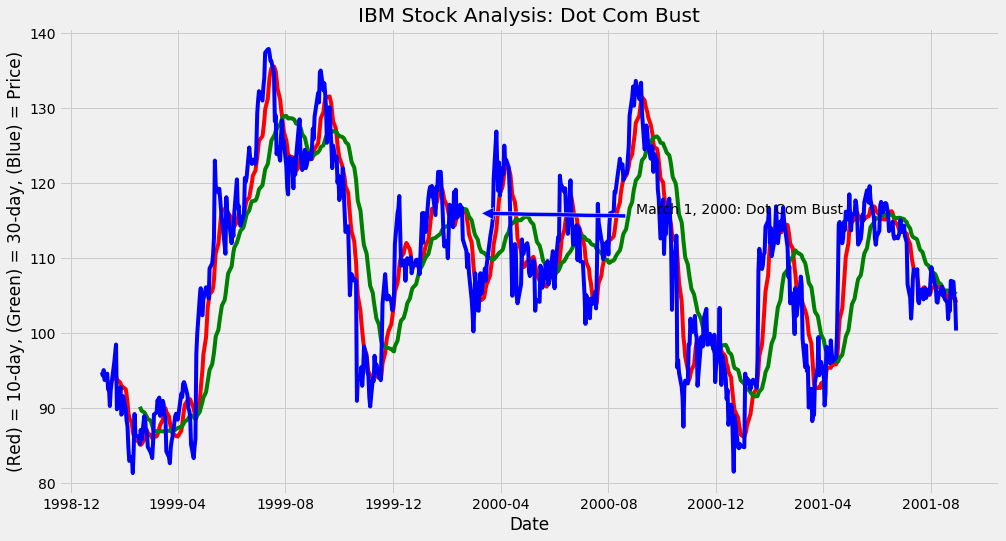

In [166]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.annotate('March 1, 2000: Dot Com Bust', xy=('2000-03-01', 116.00), xytext=('2000-09-01', 116.00),
            arrowprops=dict(facecolor='blue', shrink=0.05),)

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("IBM Stock Analysis: Dot Com Bust")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")


In [167]:
dji_df['Date'] = pd.to_datetime(dji_df['Date'])
dji_df = dji_df.sort_values(by='Date')

In [168]:
dji_dotcom_df = dji_df[(dji_df['Date'] > '1999-01-04') & (dji_df['Date'] < '2001-08-31')]
#dji_dotcom_df.head(10)

In [169]:
date2 = dji_dotcom_df['Date'].tolist()
closep2 = dji_dotcom_df['Close'].tolist()
highp2 = dji_dotcom_df['High'].tolist()
lowp2 = dji_dotcom_df['Low'].tolist()
openp2 = dji_dotcom_df['Open'].tolist()
volume2 = dji_dotcom_df['Volume'].tolist()

In [170]:
x = 0
y2 = len(date2)
ohlc2 = []

while x < y:
    append_me = date2[x], openp2[x], highp2[x], lowp2[x], closep2[x], volume2[x]
    ohlc2.append(append_me)
    x+=1
    
#months = np.arange(0,13,1)    
ma21 = moving_average(closep2,MA1)
ma22 = moving_average(closep2,MA2)
price2 = closep2
start2 = len(date[MA2-1:])
    
h_l2 = list(map(high_minus_low, highp2, lowp2))

In [171]:
print(date2[1])


1999-01-06 00:00:00


Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

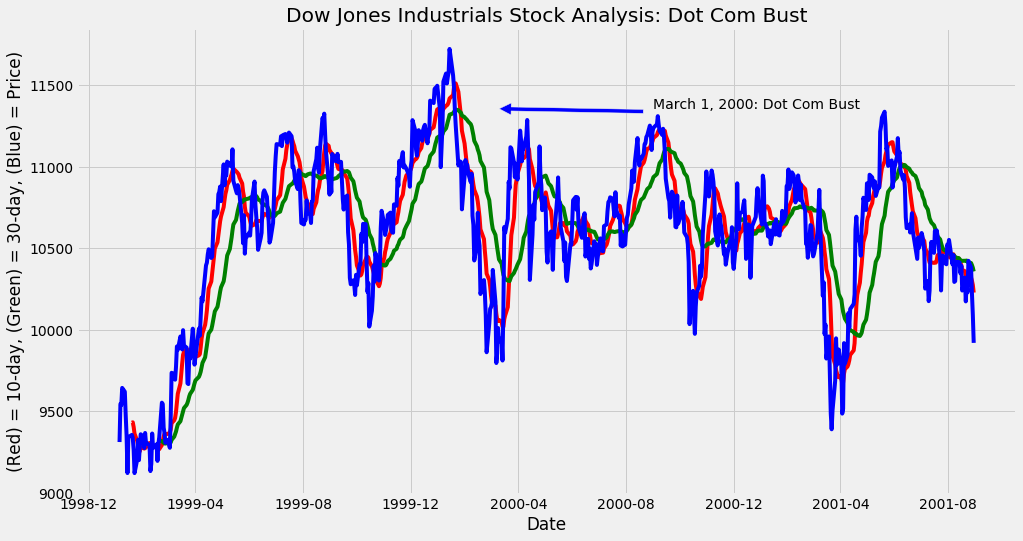

In [172]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.annotate('March 1, 2000: Dot Com Bust', xy=('2000-03-01', 11357.00), xytext=('2000-09-01', 11357.00),
            arrowprops=dict(facecolor='blue', shrink=0.05),)

MA_10, = plt.plot(short_date, ma21, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma22, color="green", label="MA_30")
Price, = plt.plot(date, price2, color="blue", label="Price")

plt.title("Dow Jones Industrials Stock Analysis: Dot Com Bust")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")

In [173]:
closep_ibm = ibm_dotcom_df['Close'].tolist()
closep_dji = dji_dotcom_df['Close'].tolist()
ma3_ibm = moving_average(closep_ibm,MA3)
ma3_dji = moving_average(closep_dji,MA3)

Text(0,0.5,'(Red) = IBM, (Green) = DJI')

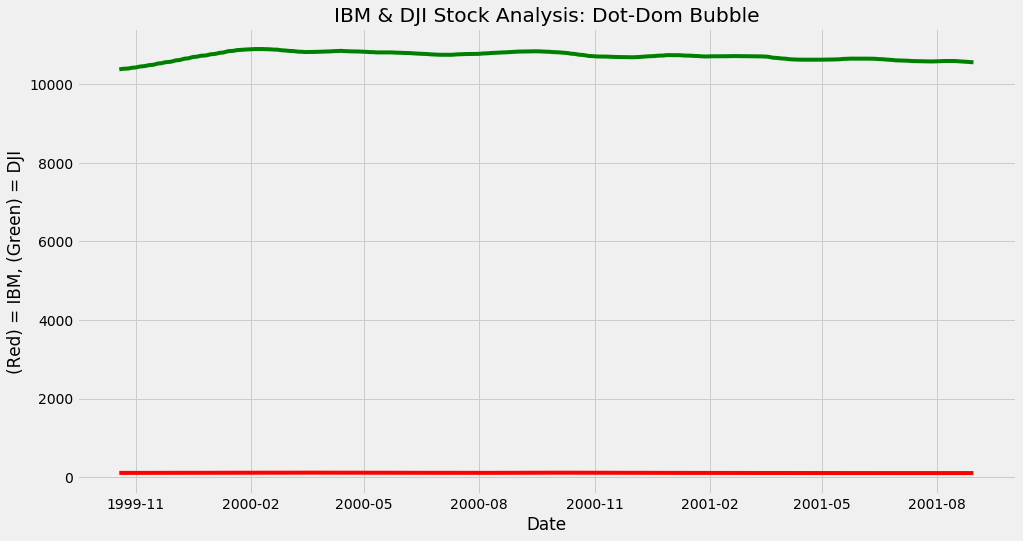

In [174]:
plt.figure(figsize=(15,8))

WMT_MA50, = plt.plot(short_date_3, ma3_ibm, color="red", label="IBM")
HD_MA50, = plt.plot(short_date_3, ma3_dji, color="green", label="DJI")

plt.title("IBM & DJI Stock Analysis: Dot-Dom Bubble")
plt.xlabel("Date")
plt.ylabel("(Red) = IBM, (Green) = DJI")

In [175]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
api_key = "164b73c522a8420c8e05343ef1da0a7e"

In [176]:
# Search for articles that mention "Hurricane Katrina"
q = "Dot Com Bust"
begin_date = '19990101'
end_date = '20010901'

In [177]:
query = url + "api-key=" + api_key + "&q=" + q +'&begin_date=' + begin_date + '&end_date=' + end_date
print(query)

https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=164b73c522a8420c8e05343ef1da0a7e&q=Dot Com Bust&begin_date=19990101&end_date=20010901


In [178]:
articles = requests.get(query).json()

In [179]:
#print(json.dumps(articles, indent=4, sort_keys=True))

In [180]:
with open('nyt.json', 'w') as outfile:
    json.dump(articles, outfile, indent=4, sort_keys=True)

In [181]:
#for article in articles["response"]["docs"]:
    #print(article)

In [182]:
article_list = [article for article in articles["response"]["docs"]]

In [183]:
#article_list

In [184]:
abstracts = []
for article in article_list:
    abstracts.append(article.get('abstract'))

#print(abstracts)

In [185]:
snippets = []
for article in article_list:
    snippets.append(article.get('snippet'))
    #print(snippets)

In [186]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [187]:
analyzer = SentimentIntensityAnalyzer()

In [188]:
compound = analyzer.polarity_scores(abstracts[0])["compound"]
pos = analyzer.polarity_scores(abstracts[0])["pos"]
neg = analyzer.polarity_scores(abstracts[0])["neg"]
neu = analyzer.polarity_scores(abstracts[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: 0.296
Positive: 0.084
Neutral: 0.916
Negative: 0.0


In [189]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [190]:
compound = analyzer.polarity_scores(snippets[0])["compound"]
pos = analyzer.polarity_scores(snippets[0])["pos"]
neg = analyzer.polarity_scores(snippets[0])["neg"]
neu = analyzer.polarity_scores(snippets[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: 0.0
Positive: 0.0
Neutral: 1.0
Negative: 0.0


In [191]:
#additional stocks
csco_df['Date'] = pd.to_datetime(csco_df['Date'])
csco_df = csco_df.sort_values(by='Date')
#
qcom_df['Date'] = pd.to_datetime(qcom_df['Date'])
qcom_df = qcom_df.sort_values(by='Date')
#
ebay_df['Date'] = pd.to_datetime(ebay_df['Date'])
ebay_df = ebay_df.sort_values(by='Date')
#
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df = amzn_df.sort_values(by='Date')

In [192]:
#
csco_dotcom_df = csco_df[(csco_df['Date'] > '1999-01-04') & (csco_df['Date'] < '2001-08-31')]
#csco_dotcom_df.head(10)
#
qcom_dotcom_df = qcom_df[(qcom_df['Date'] > '1999-01-04') & (qcom_df['Date'] < '2001-08-31')]
#qcom_dotcom_df.head(10)
#
ebay_dotcom_df = ebay_df[(ebay_df['Date'] > '1999-01-04') & (ebay_df['Date'] < '2001-08-31')]
#ebay_dotcom_df.head(10)
#
amzn_dotcom_df = amzn_df[(amzn_df['Date'] > '1999-01-04') & (amzn_df['Date'] < '2001-08-31')]
#amzn_dotcom_df.head(10)
#

In [193]:

csco_close = csco_dotcom_df['Close'].tolist()
qcom_close = qcom_dotcom_df['Close'].tolist()
ebay_close = ebay_dotcom_df['Close'].tolist()
amzn_close = amzn_dotcom_df['Close'].tolist()



In [194]:
x = 0
y2 = len(date2)
ohlccsco = []

while x < y:
    append_me = date2[x], openp2[x], highp2[x], lowp2[x], closep2[x], volume2[x]
    ohlccsco.append(append_me)
    x+=1
    
#months = np.arange(0,13,1)    
ma21 = moving_average(closep2,MA1)
ma22 = moving_average(closep2,MA2)
price2 = closep2
start2 = len(date[MA2-1:])
    
h_l2 = list(map(high_minus_low, highp2, lowp2))

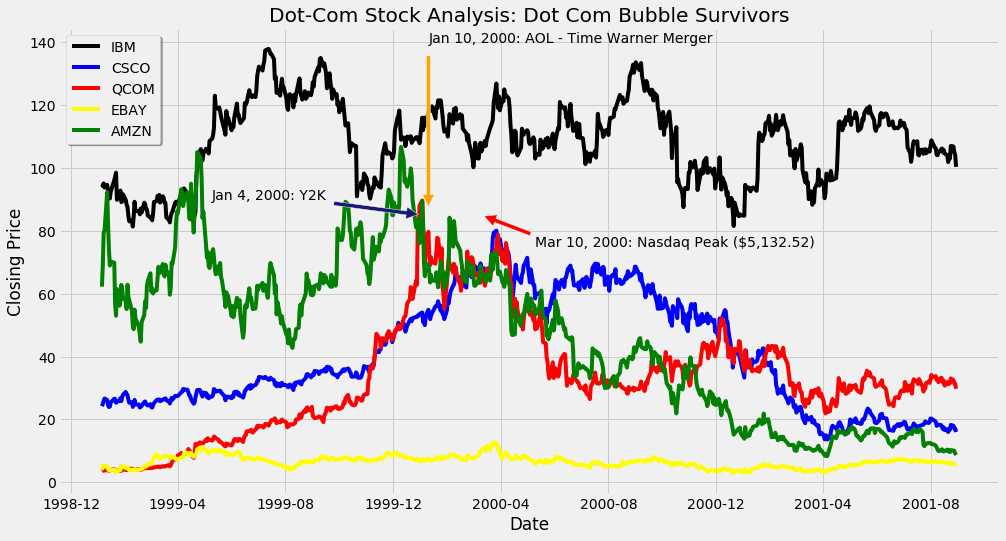

In [195]:


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

ax.annotate('Jan 10, 2000: AOL - Time Warner Merger', xy=('2000-01-10', 85), xytext=('2000-01-10', 140),
            arrowprops=dict(facecolor='orange', shrink=0.05),)

ax.annotate('Jan 4, 2000: Y2K', xy=('2000-01-04', 85), xytext=('1999-05-10', 90),
            arrowprops=dict(facecolor='midnightblue', shrink=0.05),)

ax.annotate('Mar 10, 2000: Nasdaq Peak ($5,132.52)', xy=('2000-03-10', 85), xytext=('2000-05-10', 75),
            arrowprops=dict(facecolor='red', shrink=0.05),)


plt.plot(date, ibm_close, color='black', label='IBM')
plt.plot(date, csco_close, color="blue", label="CSCO")
plt.plot(date, qcom_close, color="red", label="QCOM")
plt.plot(date, ebay_close, color="yellow", label="EBAY")
plt.plot(date, amzn_close, color="green", label="AMZN")

plt.title("Dot-Com Stock Analysis: Dot Com Bubble Survivors")
plt.xlabel("Date")
legend = ax.legend(loc='upper left', shadow=True)
#plt.ylabel("(Red) = Qualcomm, (Green) = Amazon, (Blue) = Cisco, (Yellow) = EBay")
plt.ylabel('Closing Price')

plt.show()


In [196]:
fig.savefig('DotComSurvivors.png')

In [197]:
#
ibm_dotcom1999_df = ibm_df[(ibm_df['Date'] >= '1999-01-04') & (ibm_df['Date'] <= '1999-12-31')]
#ibm_dotcom1999_df.head(10)
#
csco_dotcom1999_df = csco_df[(csco_df['Date'] >= '1999-01-04') & (csco_df['Date'] <= '1999-12-31')]
#csco_dotcom1999_df.head(10)
#
qcom_dotcom1999_df = qcom_df[(qcom_df['Date'] >= '1999-01-04') & (qcom_df['Date'] <= '1999-12-31')]
#qcom_dotcom1999_df.head(10)
#
ebay_dotcom1999_df = ebay_df[(ebay_df['Date'] >= '1999-01-04') & (ebay_df['Date'] <= '1999-12-31')]
#ebay_dotcom1999_df.head(10)
#
amzn_dotcom1999_df = amzn_df[(amzn_df['Date'] >= '1999-01-04') & (amzn_df['Date'] <= '1999-12-31')]
#amzn_dotcom1999_df.head(10)
#


In [198]:
date3 = ibm_dotcom1999_df['Date'].tolist()
ibm1999_close = ibm_dotcom1999_df['Close'].tolist()
csco1999_close = csco_dotcom1999_df['Close'].tolist()
qcom1999_close = qcom_dotcom1999_df['Close'].tolist()
ebay1999_close = ebay_dotcom1999_df['Close'].tolist()
amzn1999_close = amzn_dotcom1999_df['Close'].tolist()


In [199]:
x = 0
y3 = len(date3)
ohlccsco = []



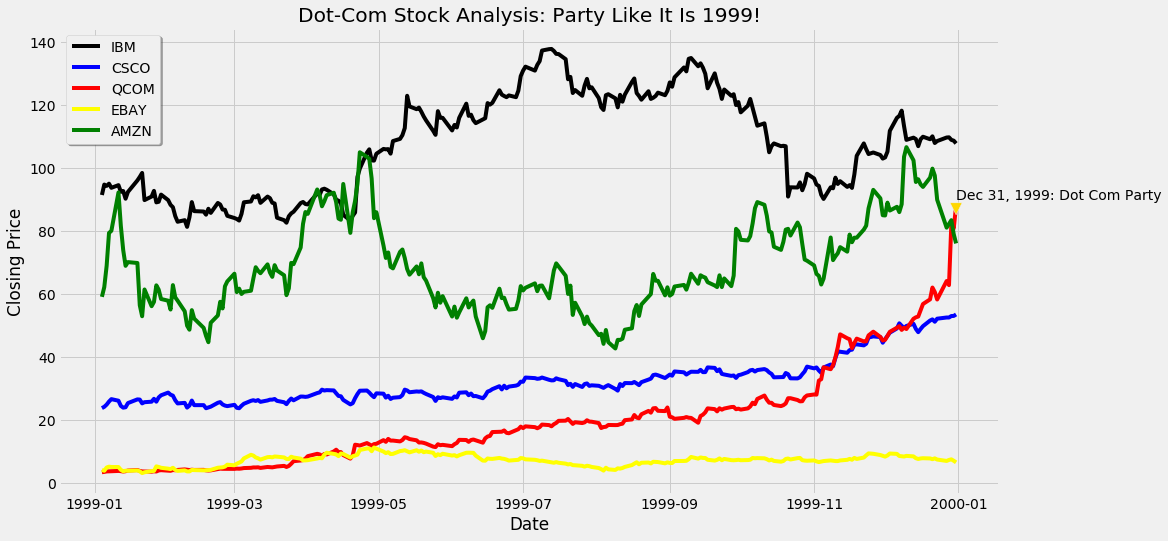

In [200]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

ax.annotate('Dec 31, 1999: Dot Com Party', xy=('1999-12-31', 85), xytext=('1999-12-31', 90.00),
            arrowprops=dict(facecolor='gold', shrink=0.05),)


plt.plot(date3, ibm1999_close, color='black', label='IBM')
plt.plot(date3, csco1999_close, color="blue", label="CSCO")
plt.plot(date3, qcom1999_close, color="red", label="QCOM")
plt.plot(date3, ebay1999_close, color="yellow", label="EBAY")
plt.plot(date3, amzn1999_close, color="green", label="AMZN")

plt.title("Dot-Com Stock Analysis: Party Like It Is 1999!")
plt.xlabel("Date")
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

plt.ylabel('Closing Price')

plt.show()

In [201]:
fig.savefig('DotComY2K.png')